# **Data Analysis of Heart Disease Dataset**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#Loading the attached csv file of the dataset on PHYTON using pandas
data=pd.read_csv("heart_disease.csv")
data.head()

,Age,Gender,Blood Pressure,Cholesterol Level,Exercise Habits,Smoking,Family Heart Disease,Diabetes,BMI,High Blood Pressure,...,High LDL Cholesterol,Alcohol Consumption,Stress Level,Sleep Hours,Sugar Consumption,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level,Heart Disease Status
0,56.0,Male,153.0,155.0,High,Yes,Yes,No,24.991591,Yes,...,No,High,Medium,7.633228,Medium,342.0,NaN,12.969246,12.387250,No
1,69.0,Female,146.0,286.0,High,No,Yes,Yes,25.221799,No,...,No,Medium,High,8.744034,Medium,133.0,157.0,9.355389,19.298875,No
2,46.0,Male,126.0,216.0,Low,No,No,No,29.855447,No,...,Yes,Low,Low,4.440440,Low,393.0,92.0,12.709873,11.230926,No
3,32.0,Female,122.0,293.0,High,Yes,Yes,No,24.130477,Yes,...,Yes,Low,High,5.249405,High,293.0,94.0,12.509046,5.961958,No
4,60.0,Male,166.0,242.0,Low,Yes,Yes,Yes,20.486289,Yes,...,No,Low,High,7.030971,High,263.0,154.0,10.381259,8.153887,No


**Basic Insights**

In [5]:
#Identifying how many rows and columns does the dataset have?
rows,cols=data.shape
print(f"The dataset has {rows} rows and {cols} columns.")

The dataset has 10000 rows and 21 columns.


In [6]:
#Displaying the summary statistics of the numerical columns.
print("Summary Stats:")
data.describe()  #by default deals with numerical cols

Summary Stats:


,Age,Blood Pressure,Cholesterol Level,BMI,Sleep Hours,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level
count,9971.000000,9981.000000,9970.000000,9978.000000,9975.000000,9974.000000,9978.000000,9974.000000,9980.000000
mean,49.296259,149.757740,225.425577,29.077269,6.991329,250.734409,120.142213,7.472201,12.456271
std,18.193970,17.572969,43.575809,6.307098,1.753195,87.067226,23.584011,4.340248,4.323426
min,18.000000,120.000000,150.000000,18.002837,4.000605,100.000000,80.000000,0.003647,5.000236
25%,34.000000,134.000000,187.000000,23.658075,5.449866,176.000000,99.000000,3.674126,8.723334
50%,49.000000,150.000000,226.000000,29.079492,7.003252,250.000000,120.000000,7.472164,12.409395
75%,65.000000,165.000000,263.000000,34.520015,8.531577,326.000000,141.000000,11.255592,16.140564
max,80.000000,180.000000,300.000000,39.996954,9.999952,400.000000,160.000000,14.997087,19.999037


In [15]:
#Finding the count of unique values in the Gender and Smoking columns.
gender=data['Gender'].nunique()
smoking=data['Smoking'].nunique()
print(f"Gender Column has {gender} unique values.")  #male and female(are the values)
print(f"Smoking Column has {smoking} unique values.") #yes and no (are the values)

Gender Column has 2 unique values.
Smoking Column has 2 unique values.


In [16]:
#Total count for each unique value
gender_count=data['Gender'].value_counts()
smoking_count=data['Smoking'].value_counts()
print("Gender Column:")
print(gender_count)
print("\nSmoking Column:")
print(smoking_count)

Gender Column:
Gender
Male      5003
Female    4978
Name: count, dtype: int64

Smoking Column:
Smoking
Yes    5123
No     4852
Name: count, dtype: int64


**Handling Missing Data**


In [17]:
#Checking if there are any missing values in the dataset.
data.isnull().sum() #finding sum of missing values

,0
Age,29
Gender,19
Blood Pressure,19
Cholesterol Level,30
Exercise Habits,25
Smoking,25
Family Heart Disease,21
Diabetes,30
BMI,22
High Blood Pressure,26


Q) If missing values exist, explain how you would handle them (Hint: Application of mean,
median, and mode).


Mean and median is used to handle the normally distributed data like:

Median for skewed distributions (Age, Cholesterol, CRP Level, etc.).

Mean for normally distributed data (Blood Pressure, BMI, Sleep Hours).

Mode (Most Frequent Value) for categorical variables.( Gender, Smoking, Diabetes, Stress Level, etc.)

and for too many missing values as in Alcohol consumption, we are dropping the column

In [22]:
#Working for above explanation
data["Age"] = data["Age"].fillna(data["Age"].median())
data["Blood Pressure"] = data["Blood Pressure"].fillna(data["Blood Pressure"].mean())
data["Cholesterol Level"] = data["Cholesterol Level"].fillna(data["Cholesterol Level"].median())
data["BMI"] = data["BMI"].fillna(data["BMI"].mean())
data["Sleep Hours"] = data["Sleep Hours"].fillna(data["Sleep Hours"].mean())
data["CRP Level"] = data["CRP Level"].fillna(data["CRP Level"].median())
data["Homocysteine Level"] = data["Homocysteine Level"].fillna(data["Homocysteine Level"].median())
data["Triglyceride Level"] = data["Triglyceride Level"].fillna(data["Triglyceride Level"].median())
data["Fasting Blood Sugar"] = data["Fasting Blood Sugar"].fillna(data["Fasting Blood Sugar"].median())

In [23]:
data.drop(columns=["Alcohol Consumption"], inplace=True)
#since there are too many missing values in Alcohol Consumption it is most feasible to drop the column

In [ ]:
#For Categorical columns do not have a meaningful mean or median.
#Mode (most common value) is a logical choice because it represents the most typical category.

In [24]:
categorical_cols = ["Gender", "Exercise Habits", "Smoking", "Family Heart Disease", "Diabetes",
                    "High Blood Pressure", "Low HDL Cholesterol", "High LDL Cholesterol",
                    "Stress Level", "Sugar Consumption"]

for col in categorical_cols:
    data[col] = data[col].fillna(data[col].mode()[0])

In [25]:
print("Missing values after handling:")
print(data.isnull().sum())

Missing values after handling:
Age                     0
Gender                  0
Blood Pressure          0
Cholesterol Level       0
Exercise Habits         0
Smoking                 0
Family Heart Disease    0
Diabetes                0
BMI                     0
High Blood Pressure     0
Low HDL Cholesterol     0
High LDL Cholesterol    0
Stress Level            0
Sleep Hours             0
Sugar Consumption       0
Triglyceride Level      0
Fasting Blood Sugar     0
CRP Level               0
Homocysteine Level      0
Heart Disease Status    0
dtype: int64


**Data Visualization**

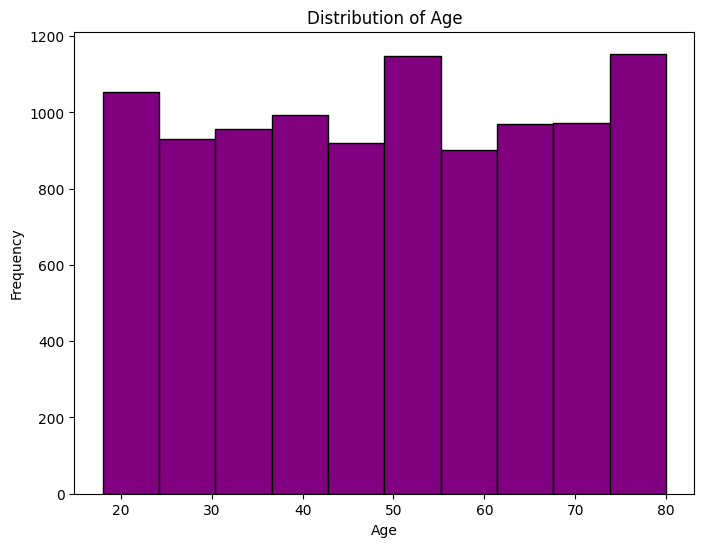

In [29]:
#Plotting a histogram of the Age column.
plt.figure(figsize=(8, 6))
plt.hist(data['Age'], color='purple', edgecolor='black')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

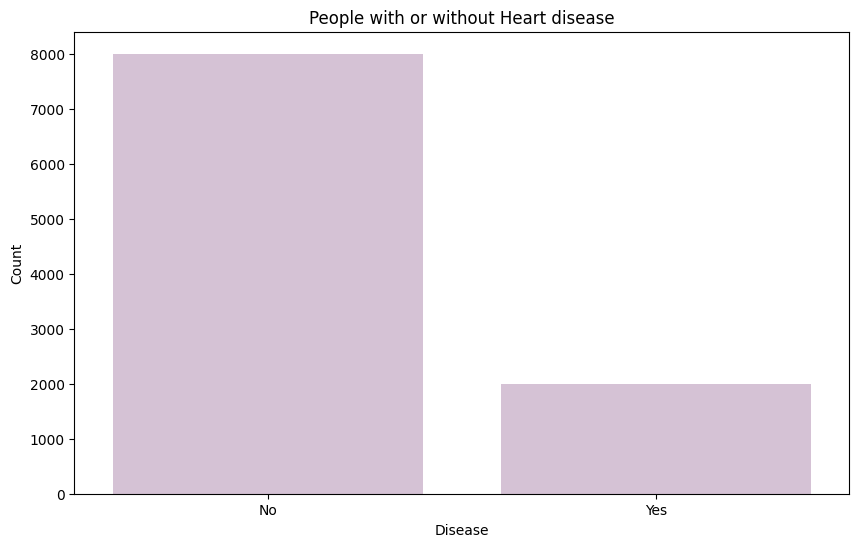

In [35]:
#Creating a bar chart showing the count of people with and without Heart Disease.
disease = data["Heart Disease Status"].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=disease.index, y=disease.values,color="#D8BFD8")#light purple
plt.xlabel("Disease")
plt.ylabel("Count")
plt.title("People with or without Heart disease")
# plt.xticks(rotation=45) rotates x-axis headings
plt.show()

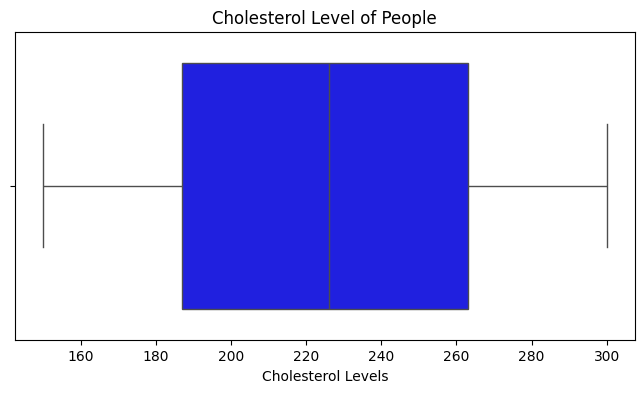

In [37]:
#Drawing a box plot of Cholesterol Level and explaining its distribution
plt.figure(figsize=(8, 4))
sns.boxplot(x=data["Cholesterol Level"],  color="blue")
plt.xlabel("Cholesterol Levels")
plt.title("Cholesterol Level of People")
plt.show()

The Median (Central Line in the Box) The thick line inside the box represents the median (50th percentile) of experience.

Interquartile Range (IQR) - Box Region The box represents the middle 50% of the data (from the 25th percentile to the 75th percentile).

A wider box means greater variability in data

Whiskers

The whiskers extend to the smallest and largest values within 1.5 times the IQR.

If whiskers are long, there is a large spread in values.

Outliers (Dots Beyond Whiskers)

If dots appear outside the whiskers, they are outliers (extremely high or low experience values).

Median = 225

Q1 = 187

Q3 = 263

Min = 150

Max = 300

Overall the Cholestrol data is balanced

